### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [55]:
#import libraries
library(ggplot2)
library(dplyr)

In [3]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [4]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [5]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [6]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Data Wrangling

The three dataframes need to be combined into one so it's easier to compare and manipulate the data.

In [7]:
# 1. add column named city to each dataframe to keep the integrity of the data
ny$City <- "New York"
chi$City <- "Chicago"
wash$City <- "Washington"

In [8]:
#2. add columns Birth.Year and Gender to wash dataframe
wash$Birth.Year <- NA
wash$Gender <- NA

In [9]:
#3. fill empty Gender cells in ny and chi dataframes with NA
ny$Gender[ny$Gender == ""] <- NA
chi$Gender[chi$Gender == ""] <- NA

In [10]:
#3. combine all three dataframes into one
cities <- bind_rows(ny, chi, wash)

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning mess

In [11]:
cities

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York
1675753,2017-03-06 16:22:53,2017-03-06 16:30:51,478,Front St & Gold St,Lafayette Ave & Fort Greene Pl,Subscriber,Male,1982,New York
1692245,2017-03-07 07:42:24,2017-03-07 08:49:42,4038,E 89 St & York Ave,Broadway & Battery Pl,Subscriber,Male,1984,New York
2271331,2017-04-02 08:02:36,2017-04-02 09:28:08,5132,Central Park S & 6 Ave,Central Park S & 6 Ave,Customer,NA,NA,New York
1558339,2017-03-01 23:01:31,2017-03-01 23:06:41,309,E 3 St & 1 Ave,E 25 St & 2 Ave,Subscriber,Male,1992,New York


### Question 1


**How many males and females are in each city?**

In [57]:
#sum of male and female values
gender_num = cities %>% group_by(City, Gender) %>% count()
gender_num

City,Gender,n
Chicago,Female,1723
Chicago,Male,5159
Chicago,NA,1748
New York,Female,12159
New York,Male,37201
New York,NA,5410
Washington,NA,89051


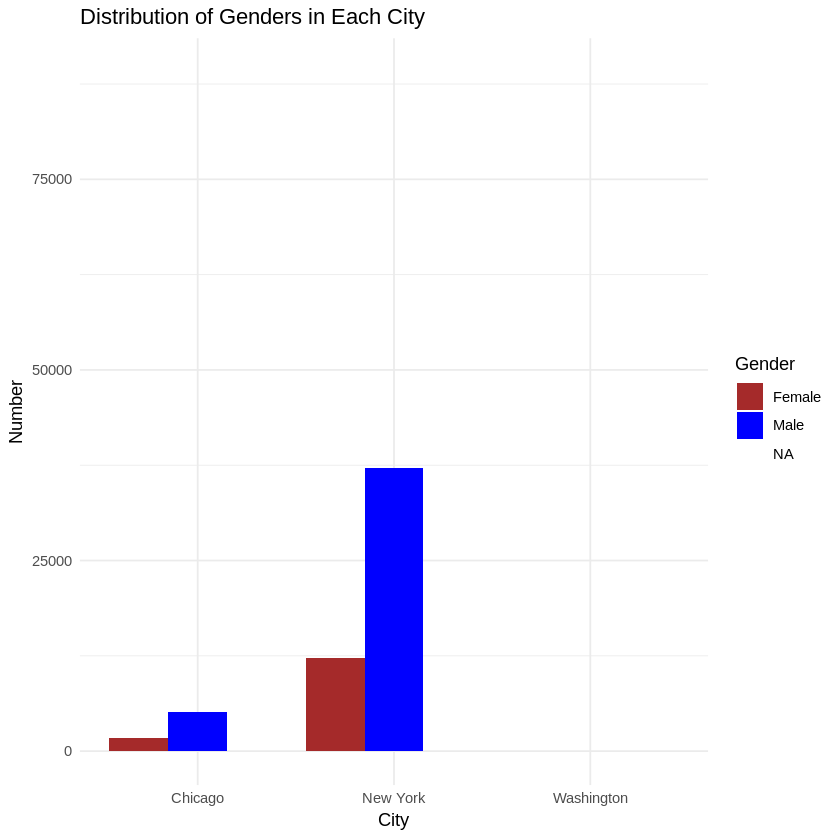

In [13]:
#Bar graph to compare numbers of males and females in each city
ggplot(gender_num, aes(x = City, y = n, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "City", y = "Number", fill = "Gender",
       title = "Distribution of Genders in Each City") +
  scale_fill_manual(values = c("brown", "blue", "orange")) +
  theme_minimal()

The Gender column was missing from Washington thus why it will be excluded from the following comparison:

In Chicago and New York, the number of users is as follows: <br>
- Male: 42360 
- Female: 13882
- NA: 7158

In Chicago 59.8% are males and 19.97% are females. Meanwhile in New York 67.9% are males and 22.2% are females.

There is a significant difference in the number of males (42,360) compared to females (13,882) who rent bikes in both Chicago and New York City.

### Question 2

**What are the top ten most common start stations?**

In [14]:
#group start stations by total count and arrange in descending order
station_counts <- head((cities %>% group_by(Start.Station) %>% count() 
                        %>% arrange(desc(n))),10) 
station_counts

Start.Station,n
Columbus Circle / Union Station,1700
Lincoln Memorial,1546
Jefferson Dr & 14th St SW,1488
Massachusetts Ave & Dupont Circle NW,1219
Jefferson Memorial,1068
15th & P St NW,1040
Smithsonian-National Mall / Jefferson Dr & 12th St SW,1010
Henry Bacon Dr & Lincoln Memorial Circle NW,910
4th St & Madison Dr NW,894
Eastern Market Metro / Pennsylvania Ave & 7th St SE,823


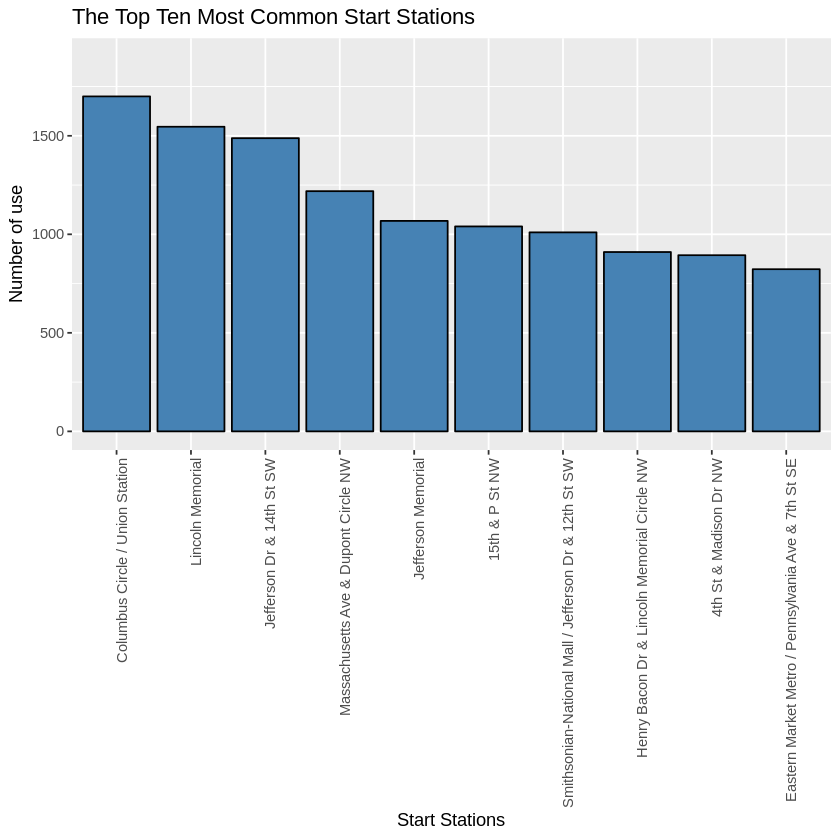

In [44]:
#creating an ordered bar graph for top ten start staions
station_counts$Start.Station <- reorder(station_counts$Start.Station, -station_counts$n)

ggplot(station_counts, aes(x = Start.Station, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue", color = "black") +
  labs(title = "The Top Ten Most Common Start Stations",
       x = "Start Stations",
       y = "Number of use") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylim(0, max(station_counts$n) + 200)

**Columbus Circle / Union Station is the most commonly used start station**

The top ten most common start stations are: <br>
1. Columbus Circle / Union Station                         1700
2. Lincoln Memorial                                        1546
3. Jefferson Dr & 14th St SW                               1488 
4. Massachusetts Ave & Dupont Circle NW                    1219 
5. Jefferson Memorial                                      1068 
6. 15th & P St NW                                          1040 
7. Smithsonian-National Mall / Jefferson Dr & 12th St SW   1010 
8. Henry Bacon Dr & Lincoln Memorial Circle NW             910 
9. 4th St & Madison Dr NW                                  894 
10. Eastern Market Metro / Pennsylvania Ave & 7th St SE    823 

### Question 3

**What is the percentage of different user types?**

In [45]:
# Calculate the count of each User.Type
user_counts <- cities %>% count(User.Type)
user_counts

User.Type,n
,121
Customer,30754
Subscriber,121576


In [51]:
# Calculate the percentage of each User.Type
user_counts$percentage <- user_counts$n / sum(user_counts$n) * 100
user_counts

User.Type,n,percentage
,121,0.07936976
Customer,30754,20.17303921
Subscriber,121576,79.74759103


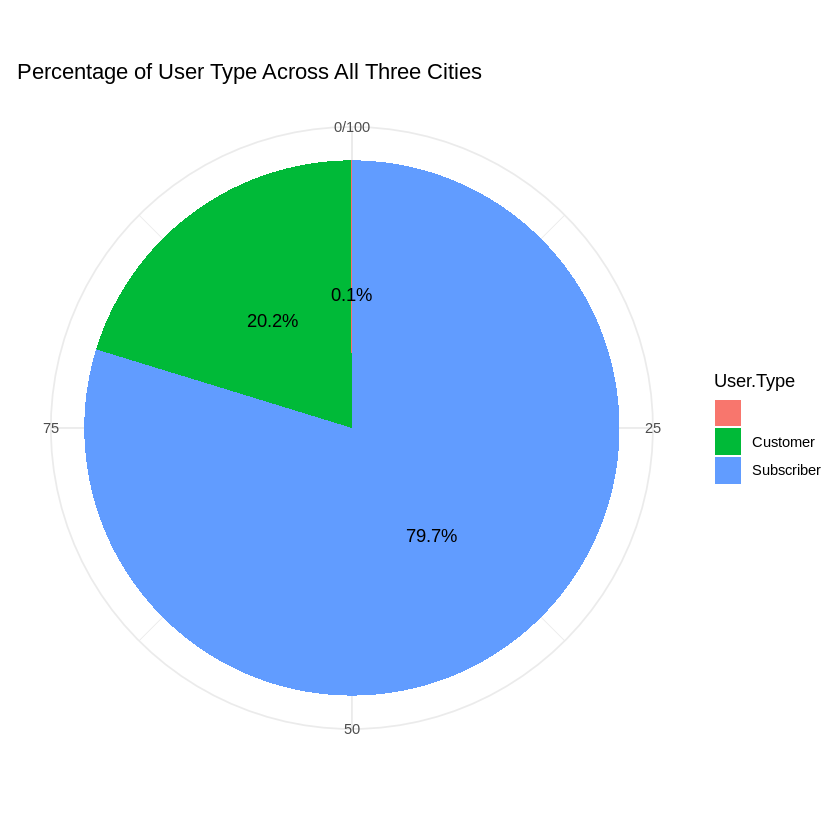

In [52]:
# Create the pie chart
ggplot(user_counts, aes(x = "", y = percentage, fill = User.Type)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Percentage of User Type Across All Three Cities",
       fill = "User.Type",
       x = NULL,
       y = NULL) +
  theme_minimal() +
  theme(legend.position = "right") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5))

**The most common type of users overall is Subscriber with 79.7%. Then comes Customer in second place with 20.2%. 0.1% is undefined.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')

## References:

https://r-graph-gallery.com/piechart-ggplot2.html <br>
https://bookdown.org/dli/rguide/bar-graph.html#ggplot2-bar-graph <br>
http://bbs.ceb-institute.org/wp-content/uploads/2011/09/handout_ggplot2.pdf